In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from scipy import stats
import seaborn as sns
#from copy import deepcopy
#import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
sns.set_theme()

In [12]:
!rm -rf ActuarialThesis

In [13]:
!ls -lhtr

total 4.0K
drwxr-xr-x 1 root root 4.0K May 25 13:42 sample_data


In [14]:
!git clone https://github.com/aderdouri/ActuarialThesis.git

Cloning into 'ActuarialThesis'...
remote: Enumerating objects: 727, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 727 (delta 1), reused 9 (delta 1), pack-reused 717
Receiving objects: 100% (727/727), 120.84 MiB | 16.72 MiB/s, done.
Resolving deltas: 100% (291/291), done.


In [15]:
!ls -ltr ActuarialThesis/AllstateClaimsSeverity

total 72132
-rw-r--r-- 1 root root   946924 May 29 07:09 myAllstateDataAnalysis2016.ipynb
-rw-r--r-- 1 root root 47182381 May 29 07:09 test.csv
-rw-r--r-- 1 root root  9873043 May 29 07:09 test.csv.zip
-rw-r--r-- 1 root root 15848282 May 29 07:09 train.csv.zip


In [16]:
train_data = pd.read_csv('ActuarialThesis/AllstateClaimsSeverity/train.csv.zip', error_bad_lines=False)
train_data.head()

Skipping line 188321: expected 132 fields, saw 133
Skipping line 188322: expected 132 fields, saw 133
Skipping line 188323: expected 132 fields, saw 133
Skipping line 188324: expected 132 fields, saw 133
Skipping line 188325: expected 132 fields, saw 133
Skipping line 188326: expected 132 fields, saw 133
Skipping line 188327: expected 132 fields, saw 133
Skipping line 188328: expected 132 fields, saw 133
Skipping line 188329: expected 132 fields, saw 133
Skipping line 188330: expected 132 fields, saw 133
Skipping line 188331: expected 132 fields, saw 133
Skipping line 188332: expected 132 fields, saw 133
Skipping line 188333: expected 132 fields, saw 133
Skipping line 188334: expected 132 fields, saw 133
Skipping line 188335: expected 132 fields, saw 133
Skipping line 188336: expected 132 fields, saw 133
Skipping line 188337: expected 132 fields, saw 133
Skipping line 188338: expected 132 fields, saw 133
Skipping line 188339: expected 132 fields, saw 133
Skipping line 188340: expected 

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1.0,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2.0,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5.0,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10.0,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11.0,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [18]:
len(list(train_data.columns))

132

In [20]:
len([col for col in train_data.columns if 'cat' in col])

116

In [21]:
len([col for col in train_data.columns if 'cont' in col])

14

In [22]:
len(train_data)

188319

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188319 entries, 0 to 188318
Columns: 132 entries, id to loss
dtypes: float64(16), object(116)
memory usage: 189.7+ MB


In [ ]:
train_data.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188319.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294134.420660,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.991768,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.348388,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147747.000000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294537.000000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440679.000000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


## Analyse de la variable cible (Target variable)

## Remarque:
Uniquement `99%` des montants de sinistres sont strictement supérieurs à zéros.

In [23]:
a = train_data['loss'].skew()
print('Skewness of loss feature is :', a)

Skewness of loss feature is : 3.7949583775378604


In [ ]:
min(train_data['loss'])

0.67

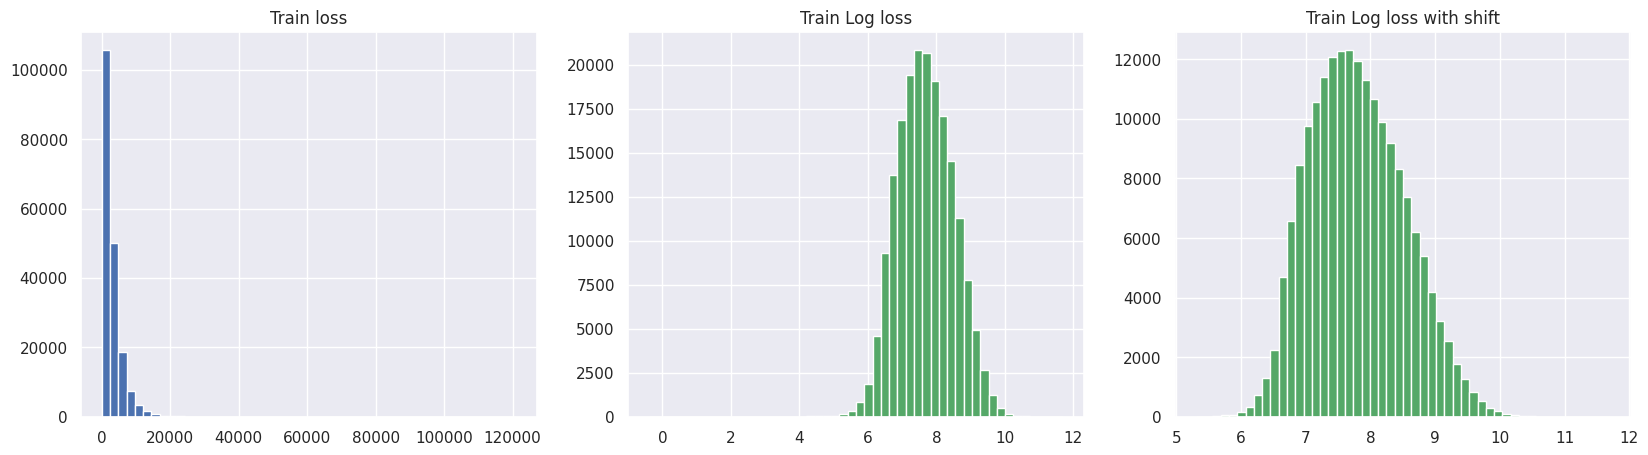

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(20, 5)

ax1.hist(train_data['loss'], bins=50)
ax1.set_title('Train loss')

ax2.hist(np.log(train_data['loss']), bins=50, color='g')
ax2.set_title('Train Log loss')

ax3.hist(np.log(train_data[train_data['loss']>0]['loss']+200), bins=50, color='g')
ax3.set_title('Train Log loss with shift')
plt.savefig('ActuarialThesis/Plots/myHistogramAllstate2016.pdf');

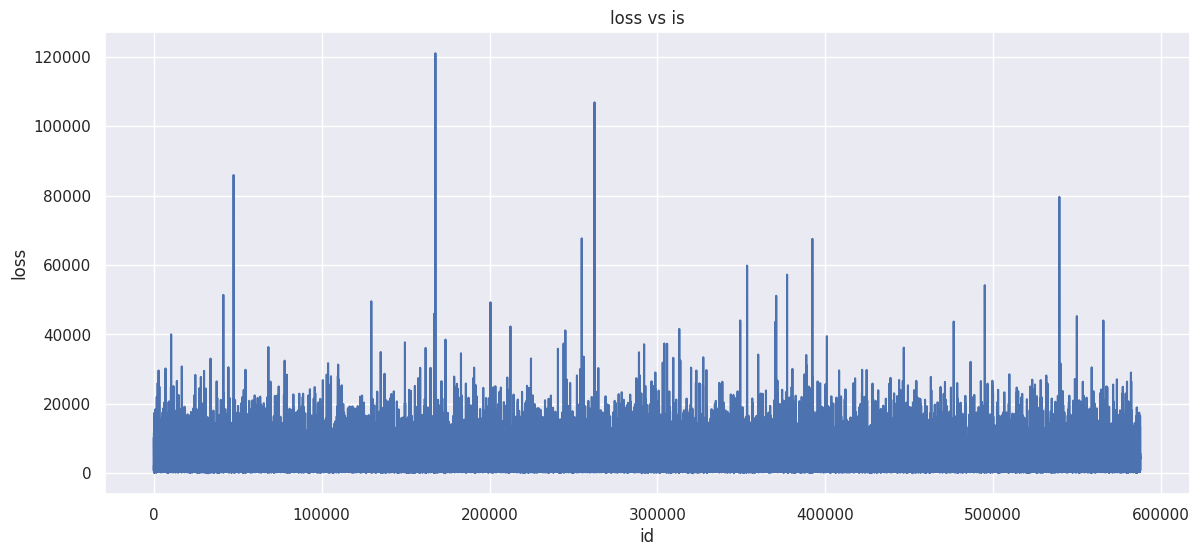

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_data['id'],train_data['loss'])
plt.xlabel('id')
plt.ylabel('loss')
plt.title('loss vs is')
plt.savefig('ActuarialThesis/Plots/myHistogramAllstateLoss2016.pdf');

## Remarque:
* Nous pouvons remarquer qu'il y a plusieurs pics dans le graphe de la caractéristique de perte, ce qui représente une perte énorme à un moment donné.
* Comme nous remarquons de nombreux pics, nous pouvons dire que les données réelles de cette caractéristique sont biaisées (skewed), ce qui peut entraîner une performance sous-optimale des modèles de régression que nous construisons.
* Les données asymétriques (désiquilibrés) ont une incidence considérable sur vos performances.

## Calculate skewness and see how we can reduce skewness.

In [ ]:
a = train_data['loss'].skew()
print('Skewness of Claim_Amount feature is :',a)

Skewness of Claim_Amount feature is : 70.72036466134124


## Observation:
* we can see that there is a lot of skewness in the target variable and this will result in wrong predictions.
* we applied log transformation over that target variable and noticed that skewness has decreased a lot.

## Plots for target variable before and after log transformation

## Box plot of target variable

Text(0.5, 1.0, 'Zoomed version of loss feature')

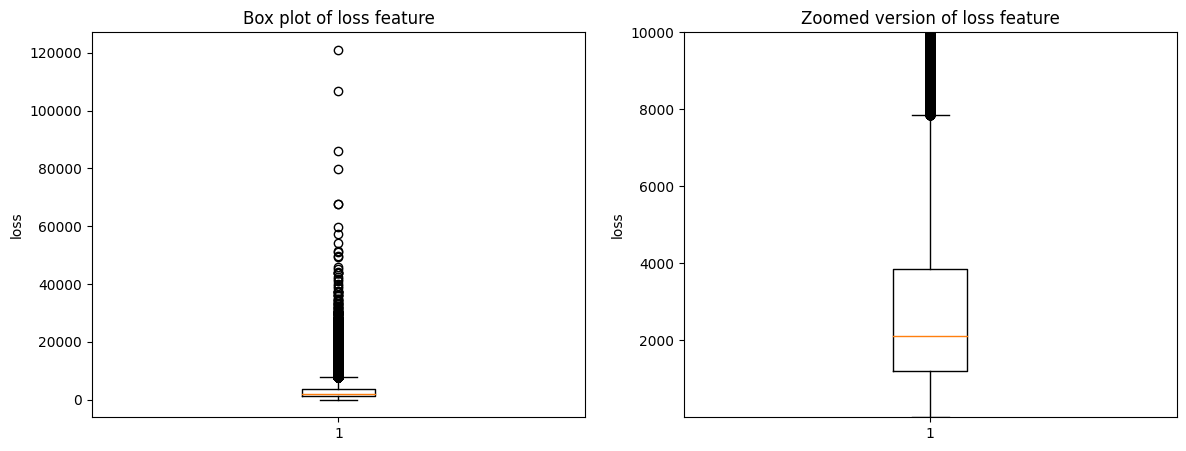

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_size_inches(14,5)
ax1.boxplot(train_data['loss'])
ax1.set_ylabel('loss')
ax1.set_title('Box plot of loss feature')


#values = uniq_values_in_categories[uniq_values_in_categories.unique_values <= 25].unique_values
ax2.set_ylim(1,10000)
ax2.boxplot(train_data['loss'])
ax2.set_ylabel('loss')
ax2.set_title('Zoomed version of loss feature')

## Remarque:
* Nous pouvons immédiatement remarquer que la plupart des valeurs des 25, 50 et 75e percentiles sont très faibles. Il y a quelques points où la perte est très élevée, habituellement nous les traitons comme des valeurs aberrantes, mais dans ce cas nous devons les traiter car l'entreprise a subi une perte énorme à ce moment-là.